# CNN Basic - Sublcassing API

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import matplotlib.pyplot as plt
import seaborn as sns

## Load Fashin MNIST dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train_sparse),(X_test, y_test_sparse) = fashion_mnist.load_data()
print(X_train.shape,X_test.shape)

y_train = to_categorical(y_train_sparse)
y_test = to_categorical(y_test_sparse)
print(y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(10000, 10)


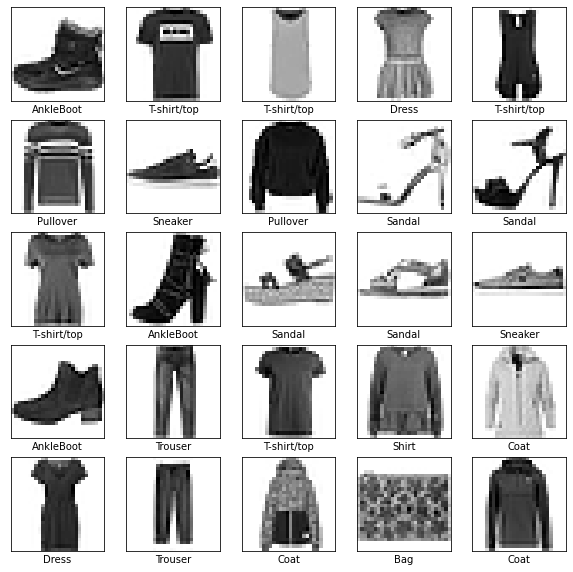

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

class_names=['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_sparse[i]])
plt.show()

In [ ]:
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

## CNN Model - Subclassing API

In [ ]:
class CNN(tf.keras.models.Model):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal', input_shape = (28, 28, 1))
    self.conv2 = Conv2D(32, kernel_size = (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu')
    self.pool = MaxPooling2D((2, 2))
    self.batch = BatchNormalization()
    self.fc = Flatten()
    self.dropout = Dropout(0.2)
    self.dense1 = Dense(16, activation = 'relu')
    self.dense2 = Dense(10, activation = 'softmax')

  def build(self, input_shape):
    super().build(input_shape)

  def call(self, x):
    x = self.conv1(x)
    x = self.batch(x)
    x = self.pool(x)
    x = self.dropout(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.dropout(x)
    x = self.fc(x)
    x = self.dense1(x)
    output = self.dense2(x)
    return output

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 2)
rp = ReduceLROnPlateau(monitor = 'val_loss', patientce = 2, factor = 0.01)

In [ ]:
model = CNN()
input = Input(shape=(28, 28, 1)) 
model(input) 
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  25104   

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test), callbacks = [es, rp])

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.7219 - accuracy: 0.7453 - val_loss: 0.3332 - val_accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3285 - accuracy: 0.8813 - val_loss: 0.2934 - val_accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2913 - accuracy: 0.8942 - val_loss: 0.2801 - val_accuracy: 0.9017
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2706 - accuracy: 0.9024 - val_loss: 0.2766 - val_accuracy: 0.8997
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2568 - accuracy: 0.9067 - val_loss: 0.2561 - val_accuracy: 0.9096
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2445 - accuracy: 0.9103 - val_loss: 0.2450 - val_accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2416 - accuracy: 0.9122 - val_loss: 0.2482 -

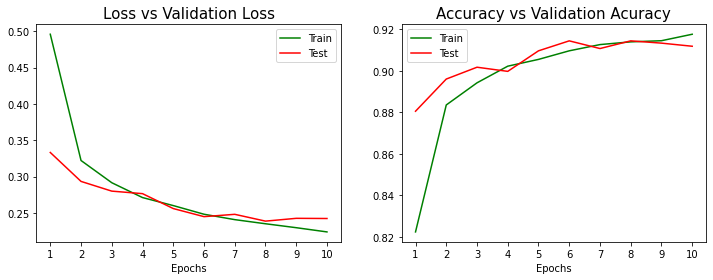

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (12, 4))

epochs = range(1, 11)

plt.subplot(1, 2, 1)
sns.lineplot(epochs, history.history['loss'], color = 'green', label = 'Train')
sns.lineplot(epochs, history.history['val_loss'], color = 'red', label = 'Test')
plt.title('Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs')
plt.xticks(range(1, 11))

plt.subplot(1, 2, 2)
sns.lineplot(epochs, history.history['accuracy'], color = 'green', label = 'Train')
sns.lineplot(epochs, history.history['val_accuracy'], color = 'red', label = 'Test')
plt.title('Accuracy vs Validation Acuracy', fontsize = 15)
plt.xlabel('Epochs')
plt.xticks(range(1, 11))
plt.legend()
plt.show()